# Kaggle Playground Series - Season 5 Episode 7 (July 2025)
###  Personality Prediction: Introvert vs Extrovert

**Author:** Magdum Shaikh  
**Competition Link:** [Kaggle Competition](https://www.kaggle.com/competitions/playground-series-s5e7)  
**Date:** July 2025

---

##  Problem Statement

In this competition, we aim to classify whether an individual is an **Introvert** or an **Extrovert** based on their personality traits and social behaviors. The dataset includes features like:
- Time spent alone
- Frequency of attending social events
- Social media posting frequency
- Drained feelings after socializing
- Friends circle size

This is a binary classification task evaluated on **Accuracy Score**.

---

##  Dataset Overview

The dataset includes:
- **`train.csv`**: Contains labeled data with `Personality` column as target.
- **`test.csv`**: Test data with no target values.
- **`sample_submission.csv`**: Format for final predictions.

| Feature Name              | Description                          |
|--------------------------|--------------------------------------|
| `id`                     | Unique identifier                    |
| `Time_spent_Alone`       | Minutes person spends alone daily    |
| `Stage_fear`             | Numerical score of public speaking fear |
| `Social_event_attendance` | Frequency of attending social events |
| `Going_outside`          | Outdoor activity frequency           |
| `Drained_after_socializing` | Score representing exhaustion after socializing |
| `Friends_circle_size`    | Count of close friends               |
| `Post_frequency`         | Frequency of social media posting    |
| `Personality`            | **Target**: Introvert or Extrovert   |

---

##  Our Approach

1. **Data Exploration & Cleaning**
   - Understand missing values and fix them
   - Explore class balance, distributions

2. **EDA (Exploratory Data Analysis)**
   - Visualize correlations
   - Compare feature patterns between introverts vs extroverts

3. **Feature Engineering**
   - Standardize/normalize if required
   - Create meaningful derived features if helpful

4. **Modeling**
   - Use ML algorithms like:
     - Logistic Regression
     - Random Forest
     - XGBoost / LightGBM
   - Tune hyperparameters with GridSearchCV or Optuna

5. **Evaluation**
   - Use validation set to check accuracy
   - Try stratified K-Fold for stability

6. **Submission**
   - Generate predictions
   - Format submission file as per `sample_submission.csv`
   - Submit on Kaggle

---

##  Final Thoughts

This competition is a great chance to practice tabular data analysis, binary classification, and feature engineering. The use of synthetic data ensures fairness and allows us to freely explore different techniques.

I hope this notebook helps beginners understand how to approach real ML problems using step-by-step methods.

---

##  Goal

- [ ] Achieve > 90% Accuracy
- [ ] Learn from top public notebooks
- [ ] Improve feature engineering and modeling techniques


In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

###loading Data from kaggle

In [152]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [153]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [154]:
!kaggle datasets download -d sbhatti34/predict-the-introverts-from-the-extroverts

Dataset URL: https://www.kaggle.com/datasets/sbhatti34/predict-the-introverts-from-the-extroverts
License(s): CC-BY-SA-4.0
predict-the-introverts-from-the-extroverts.zip: Skipping, found more recently modified local copy (use --force to force download)


In [155]:
!unzip predict-the-introverts-from-the-extroverts.zip -d data/

Archive:  predict-the-introverts-from-the-extroverts.zip
replace data/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [156]:
train_df = pd.read_csv('/content/data/train.csv')
test_df = pd.read_csv('/content/data/test.csv')

In [157]:
train_df.head(10)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
5,5,2.0,No,8.0,5.0,No,NaN,3.0,Extrovert
6,6,1.0,No,8.0,NaN,No,NaN,4.0,Extrovert
7,7,2.0,No,8.0,3.0,No,4.0,5.0,Extrovert
8,8,4.0,Yes,2.0,1.0,NaN,0.0,2.0,Introvert
9,9,1.0,No,8.0,6.0,No,14.0,9.0,Extrovert


In [158]:
train_df.tail()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
18519,18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert
18523,18523,1.0,No,8.0,6.0,No,4.0,7.0,Extrovert


In [159]:
train_df.shape

(18524, 9)

In [160]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [161]:
train_df.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [162]:
train_df.isnull().sum()

,0
id,0
Time_spent_Alone,1190
Stage_fear,1893
Social_event_attendance,1180
Going_outside,1466
Drained_after_socializing,1149
Friends_circle_size,1054
Post_frequency,1264
Personality,0


In [163]:
numerical_column = train_df.select_dtypes(exclude = ['object']).columns
categorical_column = train_df.select_dtypes(include = ['object']).columns

In [164]:
numerical_column

Index(['id', 'Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
       'Friends_circle_size', 'Post_frequency'],
      dtype='object')

In [165]:
categorical_column

Index(['Stage_fear', 'Drained_after_socializing', 'Personality'], dtype='object')

####visualizing target column

Personality
Extrovert    13699
Introvert     4825
Name: count, dtype: int64


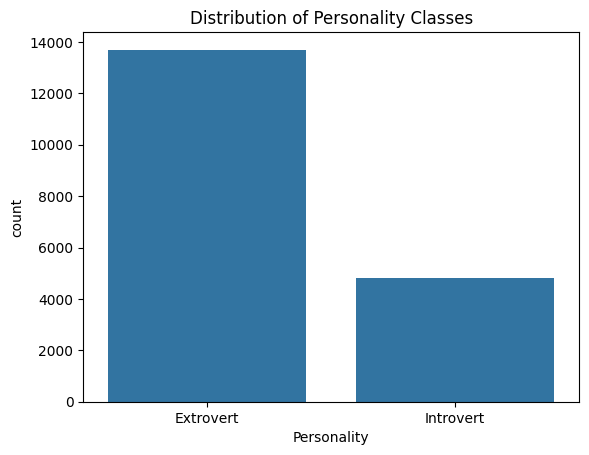

In [166]:

target_counts = train_df['Personality'].value_counts()
print(target_counts)


sns.countplot(data=train_df, x='Personality')
plt.title("Distribution of Personality Classes")
plt.show()


####Stage_fear, Drained_after_socializing these two columns are present in Yes or No categorical data so converting it into numeric data by 1 and 0

In [167]:
test_df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [168]:
# Exclude id and target
features = [col for col in train_df.columns if col not in ['id', 'Personality']]
features = [col for col in test_df.columns if col not in ['id']]

yes_no_col = ['Stage_fear','Drained_after_socializing']
for col in yes_no_col:
  train_df[col] = train_df[col].map({'Yes': 1, 'No':0})

yes_no_col = ['Stage_fear','Drained_after_socializing']
for col in yes_no_col:
  test_df[col] = test_df[col].map({'Yes': 1, 'No':0})

In [169]:
train_df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,0.0,6.0,4.0,0.0,15.0,5.0,Extrovert
1,1,1.0,0.0,7.0,3.0,0.0,10.0,8.0,Extrovert
2,2,6.0,1.0,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,0.0,7.0,3.0,0.0,11.0,5.0,Extrovert
4,4,1.0,0.0,4.0,4.0,0.0,13.0,NaN,Extrovert


#### Plot distribution of each numerical feature

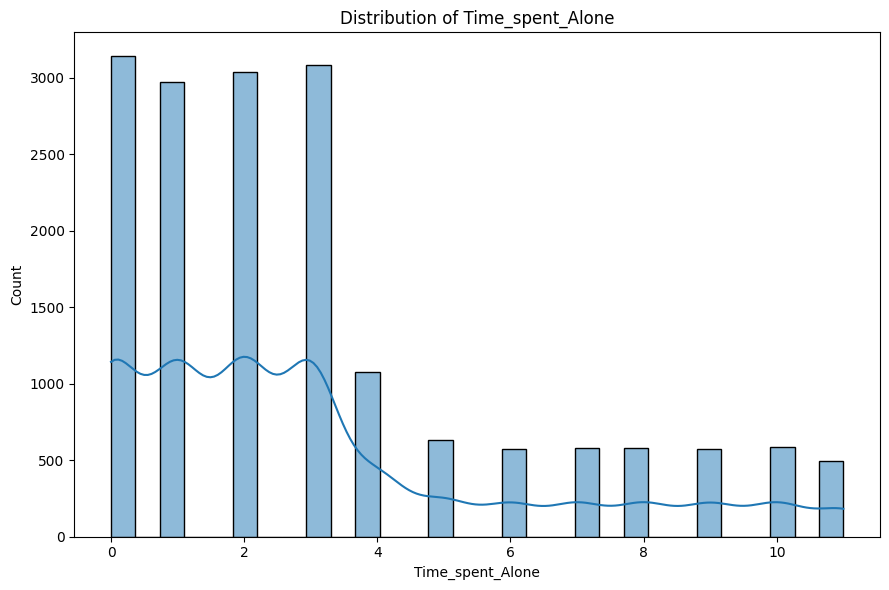

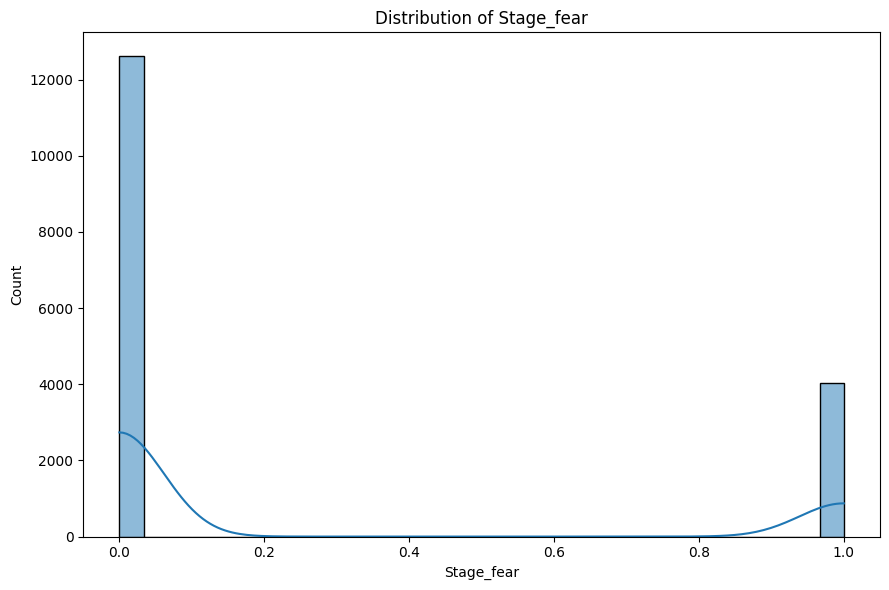

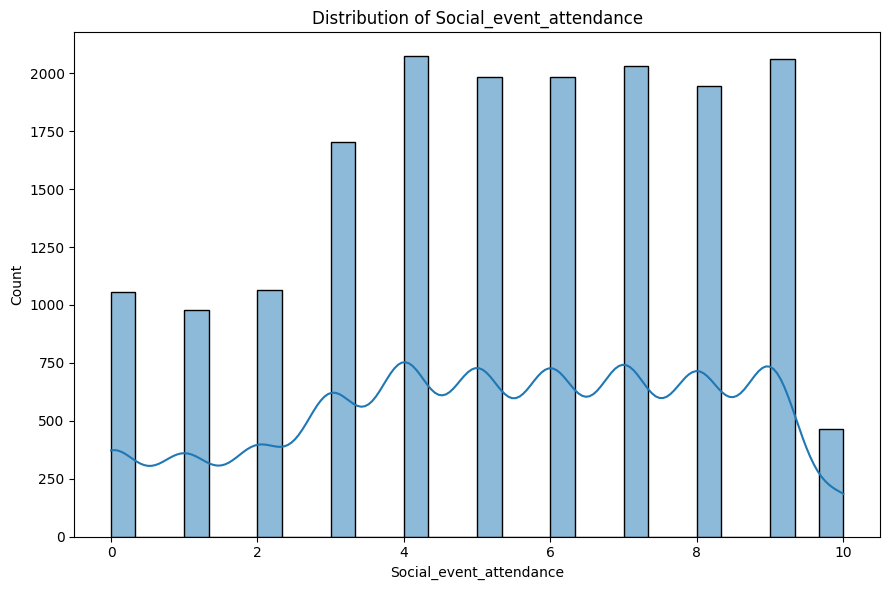

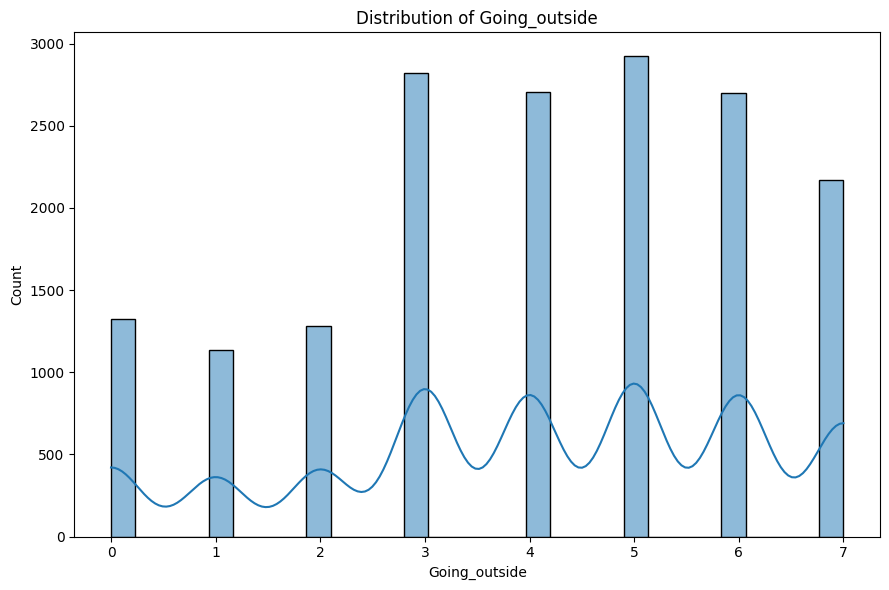

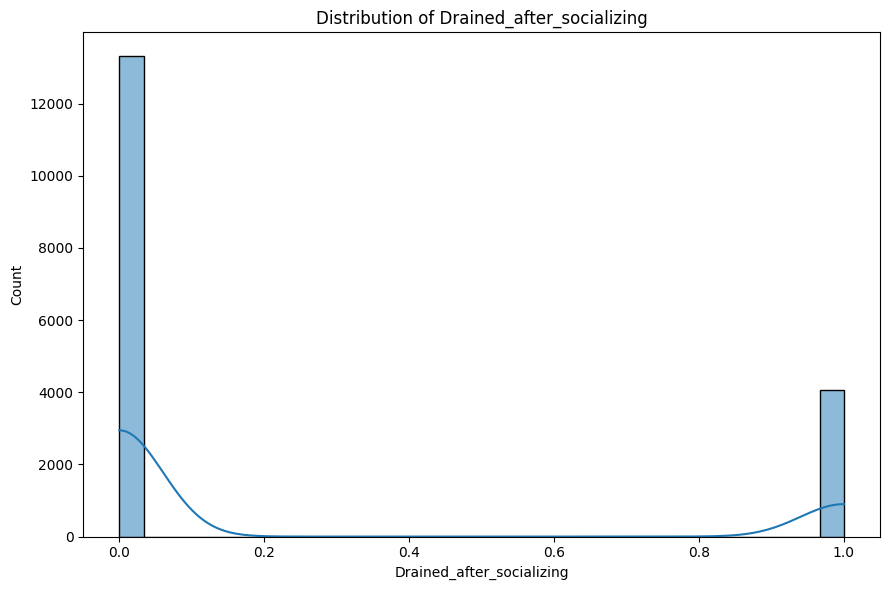

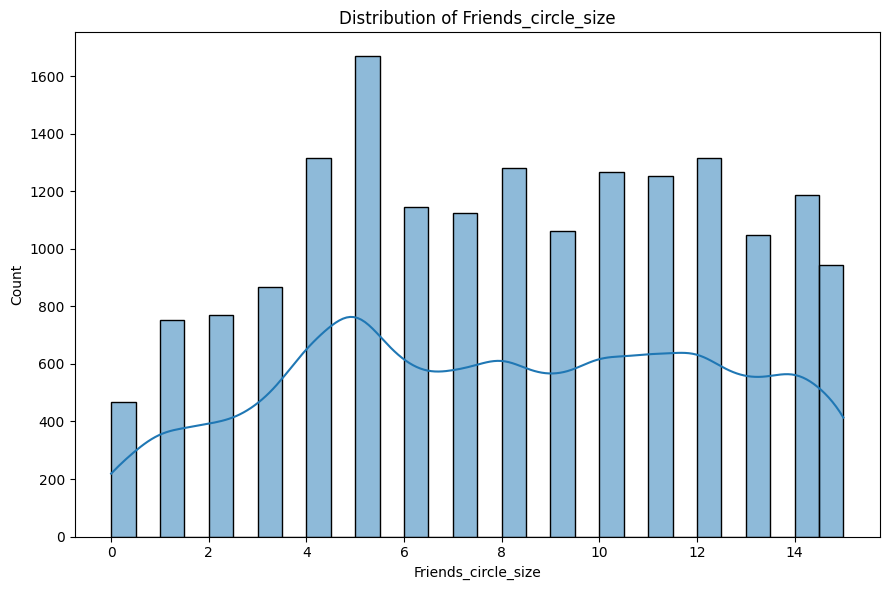

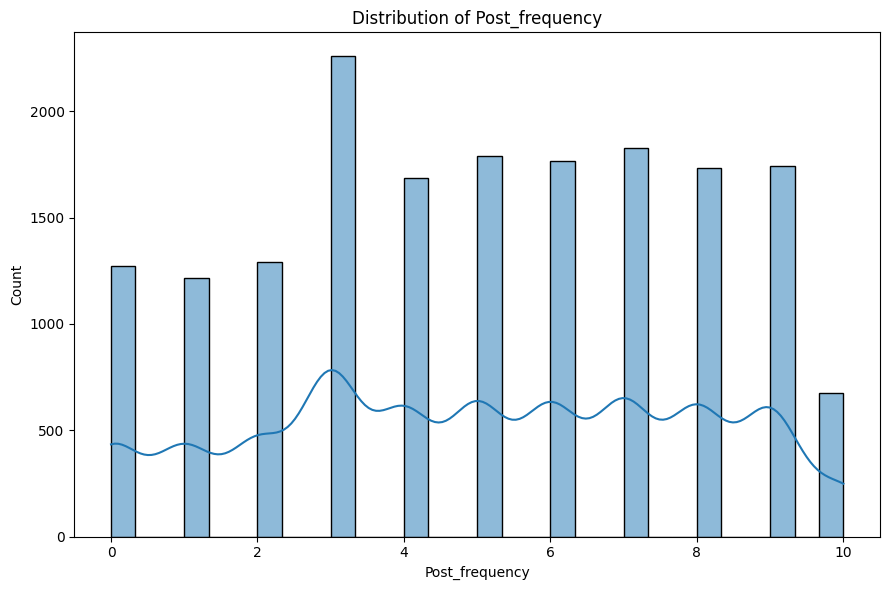

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in features:
    plt.figure(figsize=(9, 6))
    sns.histplot(train_df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()


####filling missing values

In [171]:

train_df['Time_spent_Alone'].fillna(train_df['Time_spent_Alone'].median(), inplace=True)
train_df['Stage_fear'].fillna(train_df['Stage_fear'].mean(), inplace=True)
train_df['Social_event_attendance'].fillna(train_df['Social_event_attendance'].median(), inplace=True)
train_df['Going_outside'].fillna(train_df['Going_outside'].mean(), inplace=True)
train_df['Drained_after_socializing'].fillna(train_df['Drained_after_socializing'].median(), inplace=True)
train_df['Friends_circle_size'].fillna(train_df['Friends_circle_size'].median(), inplace=True)
train_df['Post_frequency'].fillna(train_df['Post_frequency'].mode()[0], inplace=True)

/tmp/ipython-input-171-4193414737.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Time_spent_Alone'].fillna(train_df['Time_spent_Alone'].median(), inplace=True)
/tmp/ipython-input-171-4193414737.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

In [172]:
test_df['Time_spent_Alone'].fillna(train_df['Time_spent_Alone'].median(), inplace=True)
test_df['Stage_fear'].fillna(train_df['Stage_fear'].mean(), inplace=True)
test_df['Social_event_attendance'].fillna(train_df['Social_event_attendance'].median(), inplace=True)
test_df['Going_outside'].fillna(train_df['Going_outside'].mean(), inplace=True)
test_df['Drained_after_socializing'].fillna(train_df['Drained_after_socializing'].median(), inplace=True)
test_df['Friends_circle_size'].fillna(train_df['Friends_circle_size'].median(), inplace=True)
test_df['Post_frequency'].fillna(train_df['Post_frequency'].mode()[0], inplace=True)


/tmp/ipython-input-172-989387460.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Time_spent_Alone'].fillna(train_df['Time_spent_Alone'].median(), inplace=True)
/tmp/ipython-input-172-989387460.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 

####creating new features

In [173]:
train_df.head(2)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,0.0,6.0,4.0,0.0,15.0,5.0,Extrovert
1,1,1.0,0.0,7.0,3.0,0.0,10.0,8.0,Extrovert


In [174]:
scaler = MinMaxScaler()
cols_to_scale = ['Social_event_attendance', 'Friends_circle_size', 'Time_spent_Alone', 'Drained_after_socializing']
train_df[cols_to_scale] = scaler.fit_transform(train_df[cols_to_scale])
test_df[cols_to_scale] = scaler.fit_transform(test_df[cols_to_scale])

In [175]:
train_df['social_activity_score'] = train_df['Social_event_attendance'] + train_df['Friends_circle_size']
train_df['introversion_score'] = train_df['Time_spent_Alone'] + train_df['Drained_after_socializing']
train_df['social_balance_score'] = train_df['social_activity_score'] - train_df['introversion_score']

In [176]:
test_df['social_activity_score'] =test_df['Social_event_attendance'] +test_df['Friends_circle_size']
test_df['introversion_score'] =   test_df['Time_spent_Alone']       + test_df['Drained_after_socializing']
test_df['social_balance_score'] = test_df['social_activity_score'] -  test_df['introversion_score']

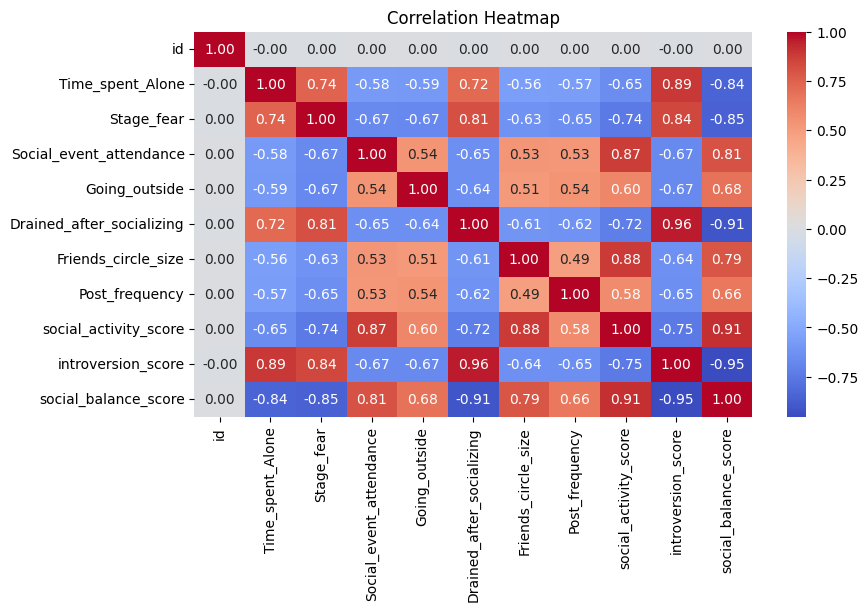

In [177]:

# Compute correlation matrix
corr_matrix = train_df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(9, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [178]:
train_df.drop(['Stage_fear', 'social_balance_score'], axis=1, inplace=True)
test_df.drop(['Stage_fear', 'social_balance_score'], axis=1, inplace=True)

In [179]:
le = LabelEncoder()
train_df['Personality'] = le.fit_transform(train_df['Personality'])

###Model training

In [180]:

# -----------------------------------
# 🎯 3. Split features and labels
# -----------------------------------
X_train = train_df.drop('Personality', axis=1)
y_train = train_df['Personality']
X_test = test_df.copy()

# -----------------------------------
# 📏 4. Scaling
# -----------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------------
# 🤖 5. Model Training
# -----------------------------------
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train_scaled, y_train)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train_scaled, y_train)

# -----------------------------------
# 🔮 6. Prediction (on test_df without labels)
# -----------------------------------
rf_preds = rf.predict(X_test_scaled)
svm_preds = svm.predict(X_test_scaled)
xgb_preds = xgb.predict(X_test_scaled)

rf_preds_decoded = le.inverse_transform(rf_preds)
svm_preds_decoded = le.inverse_transform(svm_preds)
xgb_preds_decoded = le.inverse_transform(xgb_preds)

# Choose the best one or all:
test_df['Predicted_Personality_RF'] = rf_preds_decoded
test_df['Predicted_Personality_SVM'] = svm_preds_decoded
test_df['Predicted_Personality_XGB'] = xgb_preds_decoded



# ✅ Final result
print(test_df[['Predicted_Personality_RF', 'Predicted_Personality_SVM', 'Predicted_Personality_XGB']].head())

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:16:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


  Predicted_Personality_RF Predicted_Personality_SVM Predicted_Personality_XGB
0                Extrovert                 Extrovert                 Extrovert
1                Introvert                 Introvert                 Introvert
2                Extrovert                 Extrovert                 Extrovert
3                Extrovert                 Extrovert                 Extrovert
4                Introvert                 Introvert                 Introvert


In [182]:

# test_df[['id', 'Predicted_Personality_RF']].to_csv("submission .csv", index=False)

In [185]:
final_submission = test_df[['id']].copy()
final_submission['Personality'] = test_df['Predicted_Personality_XGB']

# Save to CSV
final_submission.to_csv("submission.csv", index=False)